# The StatQuest Introduction to PyTorch!!!
## Sponsored by...
[<img src="./images/PytorchLightningLogo@4x.png" alt="Lightning" style="width: 400px;">](https://www.pytorchlightning.ai/)
&nbsp;&nbsp;&nbsp;&nbsp; <img src="./images/VerticalRule@4x.png" style="height: 100px;"> &nbsp;&nbsp;&nbsp;&nbsp;
[<img src="./images/Grid_Logo@4x.png" alt="Grid" style="width: 400px;">](https://www.grid.ai/)

Copyright 2022, Joshua Starmer

----
**NOTE:** This tutorial is from StatQuest's **[A Gentle Introduction to PyTorch]()**.

In this tutorial, we will use **[PyTorch](https://pytorch.org/)** to create, draw the output from, and optimize the super simple **neural network** featured in  StatQuest's **[Neural Networks Part 3: ReLU in Action!!!](https://youtu.be/68BZ5f7P94E)** This simple neural network, seen below, predicts whether or not a drug dose will be effective.
<!-- <img src="./xgboost_tree.png" alt="An XGBoost Tree" style="width: 600px;"> -->
<img src="./images/simple_relu.001.png" alt="A simple Neural Network" style="width: 1620px;">

The training data (below) that the neural network is fit to consist of three data points for three different drug doses. Low (**0**) and high (**1**) doses do not cure a disease, so their y-axis values are both **0**. However, when the dose is **0.5**, that dose can cure the disease, and the corresponding y-axis value is **1**.

<img src="./images/training_data_500x275.png" alt="A simple Neural Network" style="width: 250px;">

Below, we see the output of the neural network for different doses, and it fits the training data well!

<img src="./images/training_data_with_bent_shape_500x275.png" alt="A simple Neural Network" style="width: 250px;">


In this tutorial, you will...

- **[Build a Simple Neural Network in PyTorch](#build)**

- **[Use the Neural Network and Graph the Output](#using)**

- **[Optimize (Train) a Parameter in the Neural Network and Graph the Output](#train)**

#### NOTE:
This tutorial assumes that you already know the basics of coding in **Python** and are familiar with the theory behind **[Neural Networks](https://youtu.be/CqOfi41LfDw)**, **[Backpropagation](https://youtu.be/IN2XmBhILt4)**, the **[ReLU Activation Function](https://youtu.be/68BZ5f7P94E)**, **[Gradient Descent](https://youtu.be/sDv4f4s2SB8)**, and **[Stochastic Gradient Descent](https://youtu.be/vMh0zPT0tLI)**. If not, check out the **'Quests** by clicking on the links for each topic.

#### ALSO NOTE:
I strongly encourage you to play around with the code. Playing with the code is the best way to learn from it.

-----

# Import the modules that will do all the work
The very first thing we need to do is load a bunch of Python modules. Python itself is just a basic programming language. These modules give us extra functionality to create a neural network, use and graph the output for various input values, and optimize the neural network's parameters.

**NOTE:** You will need **Python 3** and have at least these versions for each of the following modules: 
- pytorch >= 1.10.1
- matplotlib >= 3.3.4
- seaborn >= 0.11.0 

### If you installed **Python 3** with [Anaconda](https://www.anaconda.com/)...
...then you can check which versions of each package you have with the command: `conda list`. If, for example, your version of `matplotlib` is older than **3.3.4**, then the easiest thing to do is just update all of your Anaconda packages with the following command: `conda update --all`. However, if you only want to update `matplotlib`, then you can run this command: `conda install matplotlib=3.3.4`.

### If you need to install **PyTorch**...
...then the easiest thing to do is follow the instructions on the [PyTorch website](https://pytorch.org/get-started/locally/).

### If you need to install **seaborn**...
...then the easiest thing to do is follow the instructions on the [seaborn website](https://seaborn.pydata.org/installing.html).

In [1]:
## NOTE: Even though we use the PyTorch module, we import it with the name 'torch', which was the original name.
import torch # torch provides basic functions, from setting a random seed (for reproducability) to creating tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import SGD # optim contains many optimizers. Here, we're using SGD, stochastic gradient descent.

import matplotlib.pyplot as plt ## matplotlib allows us to draw graphs.
import seaborn as sns ## seaborn makes it easier to draw nice-looking graphs.

/Users/samihaafafneha/opt/anaconda3/envs/tf-new/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-----

<a id="build"></a>
# Build a Simple Neural Network in PyTorch

Building a neural network in **PyTorch** means creating a new class with two methods: `__init__()` and `forward()`. The `__init__()` method defines and initializes all of the parameters that we want to use, and the `forward()` method tells **PyTorch** what should happen during a forward pass through the neural network.

In [2]:
## create a neural network class by creating a class that inherits from nn.Module.
class BasicNN(nn.Module):

    def __init__(self): # __init__() is the class constructor function, and we use it to initialize the weights and biases.
        
        super().__init__() # initialize an instance of the parent class, nn.Model.
        
        ## Now create the weights and biases that we need for our neural network.
        ## Each weight or bias is an nn.Parameter, which gives us the option to optimize the parameter by setting
        ## requires_grad, which is short for "requires gradient", to True. Since we don't need to optimize any of these
        ## parameters now, we set requires_grad=False.
        ##
        ## NOTE: Because our neural network is already fit to the data, we will input specific values
        ## for each weight and bias. In contrast, if we had not already fit the neural network to the data,
        ## we might start with a random initalization of the weights and biases.
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        
        
    def forward(self, input): ## forward() takes an input value and runs it though the neural network 
                              ## illustrated at the top of this notebook. 
        
        ## the next three lines implement the top of the neural network (using the top node in the hidden layer).
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        ## the next three lines implement the bottom of the neural network (using the bottom node in the hidden layer).
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        ## here, we combine both the top and bottom nodes from the hidden layer with the final bias.
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
    
        return output # output is the predicted effectiveness for a drug dose.

Once we have created the class that defines the neural network, we can create an actual neural network and print out its parameters, just to make sure things are what we expect.

In [3]:
## create the neural network. 
model = BasicNN()

## print out the name and value for each parameter
for name, param in model.named_parameters():
    print(name, param.data)

w00 tensor(1.7000)
b00 tensor(-0.8500)
w01 tensor(-40.8000)
w10 tensor(12.6000)
b10 tensor(0.)
w11 tensor(2.7000)
final_bias tensor(-16.)


## BAM!!!
The values for each weight and bias in `BasicNN` match the values we see in the optimized neural network (below).
<img src="./images/simple_relu.001.png" alt="A simple Neural Network" style="width: 810px;">

-----

<a id="using"></a>
# Use the Neural Network and Graph the Output

Now that we have a neural network, we can use it on a variety of doses to determine which will be effective. Then we can make a graph of these data, and this graph should match the green bent shape fit to the training data that's shown at the top of this document. So, let's start by making a sequence of input doses...

In [4]:
## now create the different doses we want to run through the neural network.
## torch.linspace() creates the sequence of numbers between, and including, 0 and 1.
input_doses = torch.linspace(start=0, end=1, steps=11)

# now print out the doses to make sure they are what we expect...
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Now that we have `input_doses`, let's run them through the neural network and graph the output...

Text(0.5, 0, 'Dose')

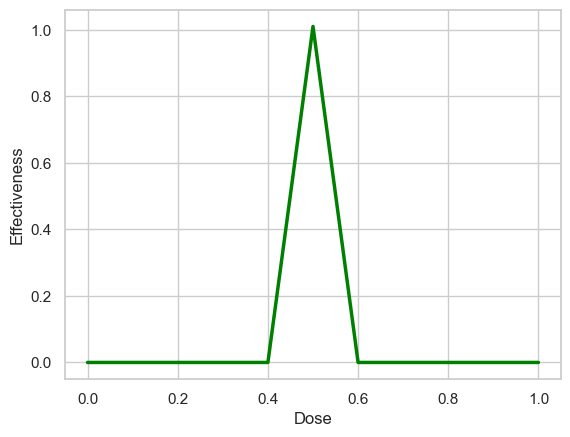

In [5]:
## create the neural network. 
model = BasicNN() 

## now run the different doses through the neural network.
output_values = model(input_doses)

## Now draw a graph that shows the effectiveness for each dose.
##
## First, set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses, 
             y=output_values, 
             color='green', 
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## optionally, save the graph as a PDF.
# plt.savefig('BasicNN.pdf')

The graph shows that the neural network fits the training data. In other words, so far, we don't have any bugs in our code.
# Double BAM!!!

-----

<a id="train"></a>
# Optimize (Train) a Parameter in the Neural Network and Graph the Output

Now that we know how to create and use a simple neural network, and we can graph the output relative to the input, let's see how to train a neural network. The first thing we need to do is tell **PyTorch** which parameter (or parameters) we want to train, and we do that by setting `requires_grad=True`. In this example, we'll train `final_bias`.

In [6]:
## create a neural network by creating a class that inherits from nn.Module.
## NOTE: This code is the same as before, except we changed the class name to BasicNN_train and we modified 
##       final_bias in two ways:
##       1) we set the value of the tensor to 0, and
##       2) we set "requires_grad=True".
class BasicNN_train(nn.Module):

    def __init__(self): # __init__ is the class constructor function, and we use it to initialize the weights and biases.
        
        super().__init__() # initialize an instance of the parent class, nn.Module.
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        ## we want to modify final_bias to demonstrate how to optimize it with backpropagation.
        ## The optimal value for final_bias is -16...
#         self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        ## ...so we set it to 0 and tell Pytorch that it now needs to calculate the gradient for this parameter.
        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True) 
        
    def forward(self, input):
        
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
    
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

Now let's graph the output of `BasicNN_train`, which is currently not optimized, and compare it to the graph we drew earlier of the optimized neural network.

Text(0.5, 0, 'Dose')

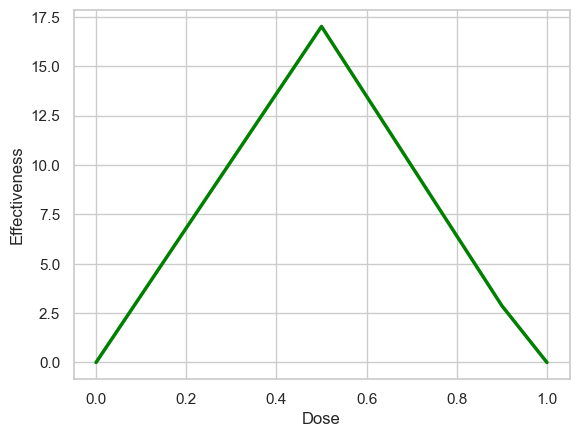

In [7]:
## create the neural network. 
model = BasicNN_train() 

## now run the different doses through the neural network.
output_values = model(input_doses)

## Now draw a graph that shows the effectiveness for each dose.
##
## set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses, 
             y=output_values.detach(), ## NOTE: because final_bias has a gradident, we call detach() 
                                       ## to return a new tensor that only has the value and not the gradient.
             color='green', 
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## lastly, save the graph as a PDF.
# plt.savefig('BasicNN_train.pdf')

The graph shows that when the dose is **0.5**, the output from the unoptimized neural network is **17**, which is wrong, since the output value should be **1**. So, now that we have a parameter we can optimize, let's create some training data that we can use to optimize it.

In [8]:
## create the training data for the neural network.
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

...and now let's use that training data to train (or optimize) `final_bias`.

In [9]:
## create the neural network we want to train.
model = BasicNN_train()

optimizer = SGD(model.parameters(), lr=0.1) ## here we're creating an optimizer to train the neural network.
                                            ## NOTE: There are a bunch of different ways to optimize a neural network.
                                            ## In this example, we'll use Stochastic Gradient Descent (SGD). However,
                                            ## another popular algortihm is Adam (which will be covered in a StatQuest).

print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

## this is the optimization loop. Each time the optimizer sees all of the training data is called an "epoch".
for epoch in range(100):
        
    ## we create and initialize total_loss for each epoch so that we can evaluate how well model fits the
    ## training data. At first, when the model doesn't fit the training data very well, total_loss
    ## will be large. However, as gradient descent improves the fit, total_loss will get smaller and smaller.
    ## If total_loss gets really small, we can decide that the model fits the data well enough and stop
    ## optimizing the fit. Otherwise, we can just keep optimizing until we reach the maximum number of epochs. 
    total_loss = 0
    
    ## this internal loop is where the optimizer sees all of the training data and where we 
    ## calculate the total_loss for all of the training data.
    for iteration in range(len(inputs)):
        
        input_i = inputs[iteration] ## extract a single input value (a single dose)...
        label_i = labels[iteration] ## ...and its corresponding label (the effectiveness for the dose).
        
        output_i = model(input_i) ## calculate the neural network output for the input (the single dose).
        
        loss = (output_i - label_i)**2 ## calculate the loss for the single value.
                                       ## NOTE: Because output_i = model(input_i), "loss" has a connection to "model"
                                       ## and the derivative (calculated in the next step) is kept and accumulated
                                       ## in "model".
        
        loss.backward() # backward() calculates the derivative for that single value and adds it to the previous one.
        
        total_loss += float(loss) # accumulate the total loss for this epoch.
        
        
    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break
      
    optimizer.step() ## take a step toward the optimal value.
    optimizer.zero_grad() ## This zeroes out the gradient stored in "model". 
                          ## Remember, by default, gradients are added to the previous step (the gradients are accumulated),
                          ## and we took advantage of this process to calculate the derivative one data point at a time.
                          ## NOTE: "optimizer" has access to "model" because of how it was created with the call 
                          ## (made earlier): optimizer = SGD(model.parameters(), lr=0.1).
                          ## ALSO NOTE: Alternatively, we can zero out the gradient with model.zero_grad().
    
    print("Step: " + str(epoch) + " Final Bias: " + str(model.final_bias.data) + "\n")
    ## now go back to the start of the loop and go through another epoch.

print("Total loss: " + str(total_loss))
print("Final bias, after optimization: " + str(model.final_bias.data))

Final bias, before optimization: tensor(0.)

Step: 0 Final Bias: tensor(-3.2020)

Step: 1 Final Bias: tensor(-5.7636)

Step: 2 Final Bias: tensor(-7.8129)

Step: 3 Final Bias: tensor(-9.4523)

Step: 4 Final Bias: tensor(-10.7638)

Step: 5 Final Bias: tensor(-11.8131)

Step: 6 Final Bias: tensor(-12.6525)

Step: 7 Final Bias: tensor(-13.3240)

Step: 8 Final Bias: tensor(-13.8612)

Step: 9 Final Bias: tensor(-14.2909)

Step: 10 Final Bias: tensor(-14.6348)

Step: 11 Final Bias: tensor(-14.9098)

Step: 12 Final Bias: tensor(-15.1298)

Step: 13 Final Bias: tensor(-15.3059)

Step: 14 Final Bias: tensor(-15.4467)

Step: 15 Final Bias: tensor(-15.5594)

Step: 16 Final Bias: tensor(-15.6495)

Step: 17 Final Bias: tensor(-15.7216)

Step: 18 Final Bias: tensor(-15.7793)

Step: 19 Final Bias: tensor(-15.8254)

Step: 20 Final Bias: tensor(-15.8623)

Step: 21 Final Bias: tensor(-15.8919)

Step: 22 Final Bias: tensor(-15.9155)

Step: 23 Final Bias: tensor(-15.9344)

Step: 24 Final Bias: tensor(-15.9

So, if everything worked correctly, the optimizer should have converged on `final_bias = 16.0019` after **34** steps, or epochs. **BAM!**

Lastly, let's graph the output from the optimized neural network and see if it's the same as what we started with. If so, then the optimization worked.

Text(0.5, 0, 'Dose')

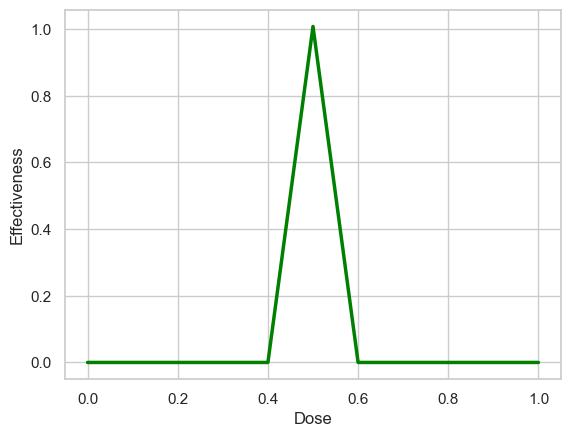

In [10]:
## run the different doses through the neural network
output_values = model(input_doses)

## set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses, 
             y=output_values.detach(), ## NOTE: we call detach() because final_bias has a gradient
             color='green', 
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## lastly, save the graph as a PDF.
# plt.savefig('BascNN_optimized.pdf')

And we see that the optimized model results in the same graph that we started with, so the optimization worked as expected.

# Triple BAM!!!